# Identifying and Recommending Best Restaurants

-by Ashish Roy

DESCRIPTION

Data Analysis is the process of creating a story using the data for easy and effective communication. It mostly utilizes visualization methods like plots, charts, and tables to convey what the data holds beyond the formal modeling or hypothesis testing task.

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
data = pd.read_excel("data.xlsx")  #importing the data

In [3]:
data.head()                        #displaying first five records

,Restaurant ID,Restaurant Name,Country Code,City,Address,Locality,Locality Verbose,Longitude,Latitude,Cuisines,Average Cost for two,Currency,Has Table booking,Has Online delivery,Price range,Aggregate rating,Rating color,Rating text,Votes
0,7402935,Skye,94,Jakarta,"Menara BCA, Lantai 56, Jl. MH. Thamrin, Thamri...","Grand Indonesia Mall, Thamrin","Grand Indonesia Mall, Thamrin, Jakarta",106.821999,-6.196778,"Italian, Continental",800000,Indonesian Rupiah(IDR),No,No,3,4.1,Green,Very Good,1498
1,7410290,Satoo - Hotel Shangri-La,94,Jakarta,"Hotel Shangri-La, Jl. Jend. Sudirman","Hotel Shangri-La, Sudirman","Hotel Shangri-La, Sudirman, Jakarta",106.818961,-6.203292,"Asian, Indonesian, Western",800000,Indonesian Rupiah(IDR),No,No,3,4.6,Dark Green,Excellent,873
2,7420899,Sushi Masa,94,Jakarta,"Jl. Tuna Raya No. 5, Penjaringan",Penjaringan,"Penjaringan, Jakarta",106.800144,-6.101298,"Sushi, Japanese",500000,Indonesian Rupiah(IDR),No,No,3,4.9,Dark Green,Excellent,605
3,7421967,3 Wise Monkeys,94,Jakarta,"Jl. Suryo No. 26, Senopati, Jakarta",Senopati,"Senopati, Jakarta",106.813400,-6.235241,Japanese,450000,Indonesian Rupiah(IDR),No,No,3,4.2,Green,Very Good,395
4,7422489,Avec Moi Restaurant and Bar,94,Jakarta,"Gedung PIC, Jl. Teluk Betung 43, Thamrin, Jakarta",Thamrin,"Thamrin, Jakarta",106.821023,-6.196270,"French, Western",350000,Indonesian Rupiah(IDR),No,No,3,4.3,Green,Very Good,243


In [4]:
data.shape                 #shape i.e., number of rows and features

(9551, 19)

In [5]:
data.nunique()

Restaurant ID           9551
Restaurant Name         7445
Country Code              15
City                     141
Address                 8918
Locality                1208
Locality Verbose        1265
Longitude               8120
Latitude                8677
Cuisines                1825
Average Cost for two     140
Currency                  12
Has Table booking          2
Has Online delivery        2
Price range                4
Aggregate rating          33
Rating color               6
Rating text                6
Votes                   1012
dtype: int64

In [6]:
data.isnull().any()                #checking for null values

Restaurant ID           False
Restaurant Name          True
Country Code            False
City                    False
Address                 False
Locality                False
Locality Verbose        False
Longitude               False
Latitude                False
Cuisines                 True
Average Cost for two    False
Currency                False
Has Table booking       False
Has Online delivery     False
Price range             False
Aggregate rating        False
Rating color            False
Rating text             False
Votes                   False
dtype: bool

In [7]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9551 entries, 0 to 9550
Data columns (total 19 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Restaurant ID         9551 non-null   int64  
 1   Restaurant Name       9550 non-null   object 
 2   Country Code          9551 non-null   int64  
 3   City                  9551 non-null   object 
 4   Address               9551 non-null   object 
 5   Locality              9551 non-null   object 
 6   Locality Verbose      9551 non-null   object 
 7   Longitude             9551 non-null   float64
 8   Latitude              9551 non-null   float64
 9   Cuisines              9542 non-null   object 
 10  Average Cost for two  9551 non-null   int64  
 11  Currency              9551 non-null   object 
 12  Has Table booking     9551 non-null   object 
 13  Has Online delivery   9551 non-null   object 
 14  Price range           9551 non-null   int64  
 15  Aggregate rating     

In [8]:
data.duplicated().sum()              #checking for duplicate values

0

In [9]:
countrycode = pd.read_excel("Country-Codep1.xlsx")
countrycode.head()

,Country Code,Country
0,1,India
1,14,Australia
2,30,Brazil
3,37,Canada
4,94,Indonesia


In [10]:
datanew = pd.merge(data,countrycode,on='Country Code',how='left')

In [11]:
datanew.head()

,Restaurant ID,Restaurant Name,Country Code,City,Address,Locality,Locality Verbose,Longitude,Latitude,Cuisines,Average Cost for two,Currency,Has Table booking,Has Online delivery,Price range,Aggregate rating,Rating color,Rating text,Votes,Country
0,7402935,Skye,94,Jakarta,"Menara BCA, Lantai 56, Jl. MH. Thamrin, Thamri...","Grand Indonesia Mall, Thamrin","Grand Indonesia Mall, Thamrin, Jakarta",106.821999,-6.196778,"Italian, Continental",800000,Indonesian Rupiah(IDR),No,No,3,4.1,Green,Very Good,1498,Indonesia
1,7410290,Satoo - Hotel Shangri-La,94,Jakarta,"Hotel Shangri-La, Jl. Jend. Sudirman","Hotel Shangri-La, Sudirman","Hotel Shangri-La, Sudirman, Jakarta",106.818961,-6.203292,"Asian, Indonesian, Western",800000,Indonesian Rupiah(IDR),No,No,3,4.6,Dark Green,Excellent,873,Indonesia
2,7420899,Sushi Masa,94,Jakarta,"Jl. Tuna Raya No. 5, Penjaringan",Penjaringan,"Penjaringan, Jakarta",106.800144,-6.101298,"Sushi, Japanese",500000,Indonesian Rupiah(IDR),No,No,3,4.9,Dark Green,Excellent,605,Indonesia
3,7421967,3 Wise Monkeys,94,Jakarta,"Jl. Suryo No. 26, Senopati, Jakarta",Senopati,"Senopati, Jakarta",106.813400,-6.235241,Japanese,450000,Indonesian Rupiah(IDR),No,No,3,4.2,Green,Very Good,395,Indonesia
4,7422489,Avec Moi Restaurant and Bar,94,Jakarta,"Gedung PIC, Jl. Teluk Betung 43, Thamrin, Jakarta",Thamrin,"Thamrin, Jakarta",106.821023,-6.196270,"French, Western",350000,Indonesian Rupiah(IDR),No,No,3,4.3,Green,Very Good,243,Indonesia


In [12]:
datanew.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 9551 entries, 0 to 9550
Data columns (total 20 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Restaurant ID         9551 non-null   int64  
 1   Restaurant Name       9550 non-null   object 
 2   Country Code          9551 non-null   int64  
 3   City                  9551 non-null   object 
 4   Address               9551 non-null   object 
 5   Locality              9551 non-null   object 
 6   Locality Verbose      9551 non-null   object 
 7   Longitude             9551 non-null   float64
 8   Latitude              9551 non-null   float64
 9   Cuisines              9542 non-null   object 
 10  Average Cost for two  9551 non-null   int64  
 11  Currency              9551 non-null   object 
 12  Has Table booking     9551 non-null   object 
 13  Has Online delivery   9551 non-null   object 
 14  Price range           9551 non-null   int64  
 15  Aggregate rating     

In [13]:
datanew.isnull().sum()

Restaurant ID           0
Restaurant Name         1
Country Code            0
City                    0
Address                 0
Locality                0
Locality Verbose        0
Longitude               0
Latitude                0
Cuisines                9
Average Cost for two    0
Currency                0
Has Table booking       0
Has Online delivery     0
Price range             0
Aggregate rating        0
Rating color            0
Rating text             0
Votes                   0
Country                 0
dtype: int64

In [14]:
datanew[datanew["Restaurant Name"].isnull()]

,Restaurant ID,Restaurant Name,Country Code,City,Address,Locality,Locality Verbose,Longitude,Latitude,Cuisines,Average Cost for two,Currency,Has Table booking,Has Online delivery,Price range,Aggregate rating,Rating color,Rating text,Votes,Country
1646,113702,NaN,1,Ahmedabad,"Opposite Sindhu Bhawan, Bodakdev, Ahmedabad",Bodakdev,"Bodakdev, Ahmedabad",72.501764,23.040163,"North Indian, Continental, Mexican, Italian",800,Indian Rupees(Rs.),No,No,3,4.1,Green,Very Good,769,India


In [15]:
datanew[datanew["Cuisines"].isnull()]

,Restaurant ID,Restaurant Name,Country Code,City,Address,Locality,Locality Verbose,Longitude,Latitude,Cuisines,Average Cost for two,Currency,Has Table booking,Has Online delivery,Price range,Aggregate rating,Rating color,Rating text,Votes,Country
9083,17374552,Corkscrew Cafe,216,Gainesville,"51 W Main St, Dahlonega, GA 30533",Dahlonega,"Dahlonega, Gainesville",-83.985800,34.531800,NaN,40,Dollar($),No,No,3,3.9,Yellow,Good,209,United States
9086,17501439,Dovetail,216,Macon,"543 Cherry St, Macon, GA 31201",Macon,"Macon, Macon",-83.627979,32.836410,NaN,40,Dollar($),No,No,3,3.8,Yellow,Good,102,United States
9094,17059060,Hillstone,216,Orlando,"215 South Orlando Avenue, Winter Park, FL 32789",Winter Park,"Winter Park, Orlando",-81.365260,28.596682,NaN,40,Dollar($),No,No,3,4.4,Green,Very Good,1158,United States
9406,17284158,Jimmie's Hot Dogs,216,Albany,"204 S Jackson St, Albany, GA 31701",Albany,"Albany, Albany",-84.153400,31.575100,NaN,10,Dollar($),No,No,1,3.9,Yellow,Good,160,United States
9494,17142698,Leonard's Bakery,216,Rest of Hawaii,"933 Kapahulu Ave, Honolulu, HI 96816",Kaimuki,"Kaimuki, Rest of Hawaii",-157.813432,21.284586,NaN,10,Dollar($),No,No,1,4.7,Dark Green,Excellent,707,United States
9504,17616465,Tybee Island Social Club,216,Savannah,"1311 Butler Ave, Tybee Island, GA 31328",Tybee Island,"Tybee Island, Savannah",-80.848297,31.995810,NaN,10,Dollar($),No,No,1,3.9,Yellow,Good,309,United States
9533,17284105,Cookie Shoppe,216,Albany,"115 N Jackson St, Albany, GA 31701",Albany,"Albany, Albany",-84.154000,31.577200,NaN,0,Dollar($),No,No,1,3.4,Orange,Average,34,United States
9535,17284211,Pearly's Famous Country Cookng,216,Albany,"814 N Slappey Blvd, Albany, GA 31701",Albany,"Albany, Albany",-84.175900,31.588200,NaN,0,Dollar($),No,No,1,3.4,Orange,Average,36,United States
9539,17606621,HI Lite Bar & Lounge,216,Miller,"109 N Broadway Ave, Miller, SD 57362",Miller,"Miller, Miller",-98.989100,44.515800,NaN,0,Dollar($),No,No,1,3.4,Orange,Average,11,United States


In [16]:
datanew.dropna(axis=0,subset=['Restaurant Name'],inplace=True)

In [17]:
datanew

,Restaurant ID,Restaurant Name,Country Code,City,Address,Locality,Locality Verbose,Longitude,Latitude,Cuisines,Average Cost for two,Currency,Has Table booking,Has Online delivery,Price range,Aggregate rating,Rating color,Rating text,Votes,Country
0,7402935,Skye,94,Jakarta,"Menara BCA, Lantai 56, Jl. MH. Thamrin, Thamri...","Grand Indonesia Mall, Thamrin","Grand Indonesia Mall, Thamrin, Jakarta",106.821999,-6.196778,"Italian, Continental",800000,Indonesian Rupiah(IDR),No,No,3,4.1,Green,Very Good,1498,Indonesia
1,7410290,Satoo - Hotel Shangri-La,94,Jakarta,"Hotel Shangri-La, Jl. Jend. Sudirman","Hotel Shangri-La, Sudirman","Hotel Shangri-La, Sudirman, Jakarta",106.818961,-6.203292,"Asian, Indonesian, Western",800000,Indonesian Rupiah(IDR),No,No,3,4.6,Dark Green,Excellent,873,Indonesia
2,7420899,Sushi Masa,94,Jakarta,"Jl. Tuna Raya No. 5, Penjaringan",Penjaringan,"Penjaringan, Jakarta",106.800144,-6.101298,"Sushi, Japanese",500000,Indonesian Rupiah(IDR),No,No,3,4.9,Dark Green,Excellent,605,Indonesia
3,7421967,3 Wise Monkeys,94,Jakarta,"Jl. Suryo No. 26, Senopati, Jakarta",Senopati,"Senopati, Jakarta",106.813400,-6.235241,Japanese,450000,Indonesian Rupiah(IDR),No,No,3,4.2,Green,Very Good,395,Indonesia
4,7422489,Avec Moi Restaurant and Bar,94,Jakarta,"Gedung PIC, Jl. Teluk Betung 43, Thamrin, Jakarta",Thamrin,"Thamrin, Jakarta",106.821023,-6.196270,"French, Western",350000,Indonesian Rupiah(IDR),No,No,3,4.3,Green,Very Good,243,Indonesia
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9546,18279289,BMG - All Day Dining,1,Dehradun,"140 A, Rajpur Road, Jakhan, Dehradun",Jakhan,"Jakhan, Dehradun",78.068890,30.362686,"Chinese, North Indian, Fast Food",0,Indian Rupees(Rs.),No,No,1,4.3,Green,Very Good,63,India
9547,2300497,Atmosphere Grill Cafe Sheesha,1,Kanpur,"8th Floor, J.S. Tower, 16/106 - Mall Road, Kan...",Mall Road,"Mall Road, Kanpur",80.354002,26.472001,"Indian, Chinese, Continental",0,Indian Rupees(Rs.),No,No,1,3.6,Yellow,Good,34,India
9548,18312106,UrbanCrave,1,Kanpur,"14/125, The Mall, Mall Road, Colonelganj, Para...",Parade,"Parade, Kanpur",80.342796,26.474986,"Cafe, Continental, Desserts, Ice Cream, Italia...",0,Indian Rupees(Rs.),No,No,1,3.9,Yellow,Good,127,India
9549,3900245,Deena Chat Bhandar,1,Varanasi,"D-47/184, Luxa Road, Dashaswmedh Road, Varanasi",Dashaswmedh Road,"Dashaswmedh Road, Varanasi",0.000000,0.000000,Street Food,0,Indian Rupees(Rs.),No,No,1,3.8,Yellow,Good,78,India


In [18]:
datanew[1645:1648]  #so the 1646 row is dropped

,Restaurant ID,Restaurant Name,Country Code,City,Address,Locality,Locality Verbose,Longitude,Latitude,Cuisines,Average Cost for two,Currency,Has Table booking,Has Online delivery,Price range,Aggregate rating,Rating color,Rating text,Votes,Country
1645,3400348,G Thal,1,Agra,"3/20, KPS Tower, Near Tulsi Talkies, Bypass Ro...",Khandari,"Khandari, Agra",0.000000,0.000000,"Rajasthani, Gujarati, Mughlai",800,Indian Rupees(Rs.),No,No,3,3.6,Yellow,Good,59,India
1647,2400403,Pind Balluchi,1,Allahabad,"5-A, Sardar Patel Marg, Civil Lines, Allahabad",Civil Lines,"Civil Lines, Allahabad",0.000000,0.000000,"North Indian, Mughlai",800,Indian Rupees(Rs.),No,No,3,3.2,Orange,Average,6,India
1648,2400010,Moti Mahal Delux,1,Allahabad,"Second Floor, Vinayak City Center Mall, SP Mar...","Vinayak City Centre Mall, Civil Lines","Vinayak City Centre Mall, Civil Lines, Allahabad",81.834492,25.454697,"Mughlai, North Indian, Chinese",800,Indian Rupees(Rs.),No,No,3,3.3,Orange,Average,58,India


In [19]:
datanew.reset_index(drop=True,inplace=True)  #resetting index

In [20]:
datanew.head()

,Restaurant ID,Restaurant Name,Country Code,City,Address,Locality,Locality Verbose,Longitude,Latitude,Cuisines,Average Cost for two,Currency,Has Table booking,Has Online delivery,Price range,Aggregate rating,Rating color,Rating text,Votes,Country
0,7402935,Skye,94,Jakarta,"Menara BCA, Lantai 56, Jl. MH. Thamrin, Thamri...","Grand Indonesia Mall, Thamrin","Grand Indonesia Mall, Thamrin, Jakarta",106.821999,-6.196778,"Italian, Continental",800000,Indonesian Rupiah(IDR),No,No,3,4.1,Green,Very Good,1498,Indonesia
1,7410290,Satoo - Hotel Shangri-La,94,Jakarta,"Hotel Shangri-La, Jl. Jend. Sudirman","Hotel Shangri-La, Sudirman","Hotel Shangri-La, Sudirman, Jakarta",106.818961,-6.203292,"Asian, Indonesian, Western",800000,Indonesian Rupiah(IDR),No,No,3,4.6,Dark Green,Excellent,873,Indonesia
2,7420899,Sushi Masa,94,Jakarta,"Jl. Tuna Raya No. 5, Penjaringan",Penjaringan,"Penjaringan, Jakarta",106.800144,-6.101298,"Sushi, Japanese",500000,Indonesian Rupiah(IDR),No,No,3,4.9,Dark Green,Excellent,605,Indonesia
3,7421967,3 Wise Monkeys,94,Jakarta,"Jl. Suryo No. 26, Senopati, Jakarta",Senopati,"Senopati, Jakarta",106.813400,-6.235241,Japanese,450000,Indonesian Rupiah(IDR),No,No,3,4.2,Green,Very Good,395,Indonesia
4,7422489,Avec Moi Restaurant and Bar,94,Jakarta,"Gedung PIC, Jl. Teluk Betung 43, Thamrin, Jakarta",Thamrin,"Thamrin, Jakarta",106.821023,-6.196270,"French, Western",350000,Indonesian Rupiah(IDR),No,No,3,4.3,Green,Very Good,243,Indonesia


In [21]:
datanew["Cuisines"].fillna("others",inplace=True)  
#there are only 9 null values in Cuisnes column so replacing tha NaN values with "others"

In [22]:
datanew.isnull().any()

Restaurant ID           False
Restaurant Name         False
Country Code            False
City                    False
Address                 False
Locality                False
Locality Verbose        False
Longitude               False
Latitude                False
Cuisines                False
Average Cost for two    False
Currency                False
Has Table booking       False
Has Online delivery     False
Price range             False
Aggregate rating        False
Rating color            False
Rating text             False
Votes                   False
Country                 False
dtype: bool

In [23]:
#so now there are no missing or null values in the dataset

In [24]:
#Explore the geographical distribution of the restaurants and identify the cities with the maximum and minimum number of restaurants

In [25]:
by_cities = datanew.groupby(['Country','City']).agg(Count = ('Restaurant ID','count'))

In [26]:
by_cities

Count
Country       City                 
Australia     Armidale            1
              Balingup            1
              Beechworth          1
              Dicky Beach         1
              East Ballina        1
...                             ...
United States Valdosta           20
              Vernonia            1
              Waterloo           20
              Weirton             1
              Winchester Bay      1

[141 rows x 1 columns]

In [27]:
by_cities.max()

Count    5473
dtype: int64

In [28]:
by_cities.describe()

,Count
count,141.000000
mean,67.730496
std,476.723952
min,1.000000
25%,1.000000
50%,20.000000
75%,20.000000
max,5473.000000


In [29]:
by_cities.sort_values(by='Count',ascending=False)

Count
Country       City                 
India         New Delhi        5473
              Gurgaon          1118
              Noida            1080
              Faridabad         251
              Ghaziabad          25
...                             ...
              Panchkula           1
Australia     Balingup            1
Indonesia     Bandung             1
Phillipines   Quezon City         1
United States Winchester Bay      1

[141 rows x 1 columns]

So from the above output, it is clear that "New Delhi" has the maximum number of restaurants

there are so many cities with only one restaurants (minimum), lets find out those cities

In [30]:
cities_with_minimum_rest = by_cities[by_cities['Count']==1]

In [31]:
cities_with_minimum_rest

Count
Country       City                   
Australia     Armidale              1
              Balingup              1
              Beechworth            1
              Dicky Beach           1
              East Ballina          1
              Flaxton               1
              Forrest               1
              Huskisson             1
              Inverloch             1
              Lakes Entrance        1
              Lorn                  1
              Macedon               1
              Mayfield              1
              Middleton Beach       1
              Montville             1
              Palm Cove             1
              Paynesville           1
              Penola                1
              Phillip Island        1
              Tanunda               1
              Trentham East         1
              Victor Harbor         1
Canada        Chatham-Kent          1
              Consort               1
              Vineland Station      1
              Yorkton               1
India         Mohali                1
              Panchkula             1
Indonesia     Bandung               1
Phillipines   Quezon City           1
              Tagaytay City         1
South Africa  Randburg              1
United States Clatskanie            1
              Cochrane              1
              Fernley               1
              Lakeview              1
              Lincoln               1
              Mc Millan             1
              Miller                1
              Monroe                1
              Ojo Caliente          1
              Potrero               1
              Princeton             1
              Vernonia              1
              Weirton               1
              Winchester Bay        1

In [32]:
cities_with_minimum_rest.count()

Count    46
dtype: int64

So, the number of cities with minimum (only one restaurant) number of restaurants are 46

In [33]:
datanew.head()

,Restaurant ID,Restaurant Name,Country Code,City,Address,Locality,Locality Verbose,Longitude,Latitude,Cuisines,Average Cost for two,Currency,Has Table booking,Has Online delivery,Price range,Aggregate rating,Rating color,Rating text,Votes,Country
0,7402935,Skye,94,Jakarta,"Menara BCA, Lantai 56, Jl. MH. Thamrin, Thamri...","Grand Indonesia Mall, Thamrin","Grand Indonesia Mall, Thamrin, Jakarta",106.821999,-6.196778,"Italian, Continental",800000,Indonesian Rupiah(IDR),No,No,3,4.1,Green,Very Good,1498,Indonesia
1,7410290,Satoo - Hotel Shangri-La,94,Jakarta,"Hotel Shangri-La, Jl. Jend. Sudirman","Hotel Shangri-La, Sudirman","Hotel Shangri-La, Sudirman, Jakarta",106.818961,-6.203292,"Asian, Indonesian, Western",800000,Indonesian Rupiah(IDR),No,No,3,4.6,Dark Green,Excellent,873,Indonesia
2,7420899,Sushi Masa,94,Jakarta,"Jl. Tuna Raya No. 5, Penjaringan",Penjaringan,"Penjaringan, Jakarta",106.800144,-6.101298,"Sushi, Japanese",500000,Indonesian Rupiah(IDR),No,No,3,4.9,Dark Green,Excellent,605,Indonesia
3,7421967,3 Wise Monkeys,94,Jakarta,"Jl. Suryo No. 26, Senopati, Jakarta",Senopati,"Senopati, Jakarta",106.813400,-6.235241,Japanese,450000,Indonesian Rupiah(IDR),No,No,3,4.2,Green,Very Good,395,Indonesia
4,7422489,Avec Moi Restaurant and Bar,94,Jakarta,"Gedung PIC, Jl. Teluk Betung 43, Thamrin, Jakarta",Thamrin,"Thamrin, Jakarta",106.821023,-6.196270,"French, Western",350000,Indonesian Rupiah(IDR),No,No,3,4.3,Green,Very Good,243,Indonesia


In [34]:
national_presence = datanew.groupby(['Restaurant Name',"Country"]).agg(Count = ('Restaurant Name','count'))

In [35]:
national_presence.count()

Count    7472
dtype: int64

In [ ]:
national_presence.sort_values(by='Count',ascending=False)

By looking the above output we can clearly see that

franchise with most national presence is " Cafe Coffee Day".

In [ ]:
datanew["Restaurant Name"].value_counts()  #this is the short cut method

In [ ]:
datanew1 = datanew.copy()

In [ ]:
datanew1.columns

In [ ]:
dummy = ['Has Table booking','Has Online delivery']
datanew1 = pd.get_dummies(datanew1,columns=dummy,drop_first=True)
datanew1.head()

# 0 indicating 'NO' and 1 indicating 'YES'

In [ ]:
table_booking = datanew1[datanew1['Has Table booking_Yes']==1]['Restaurant ID'].count()
table_booking

In [ ]:
no_table_booking =datanew1[datanew1['Has Table booking_Yes']==0]['Restaurant ID'].count()
no_table_booking

In [ ]:
Ratio=(table_booking/no_table_booking)
Ratio

Ratio between restaurants that allow table booking vs. those that do not allow table booking is 0.137 i.e., = 0.14

In [ ]:
Percentage_of_restaurants_providing_table_booking = (1158/9550)*100

In [ ]:
Percentage_of_restaurants_providing_table_booking

The percentage of restaurants providing tabel booking is 12.1%

In [ ]:
x = np.array([8392,1158])
labels= ["Table booking not allowed", "Table booking allowed"]

plt.pie(x , labels = labels, autopct='%1.2f%%',startangle=90)
plt.show()

In [ ]:
Online_delivery = datanew1[datanew1['Has Online delivery_Yes'] == 1]['Restaurant ID'].count()
No_online_delivery = datanew1[datanew1['Has Online delivery_Yes'] == 0]['Restaurant ID'].count()

In [ ]:
print(Online_delivery,No_online_delivery)

In [ ]:
print('Percentage of restaurants providing online delivery is {} %'.format((round(Online_delivery/len(datanew1),3)*100)))

In [ ]:
y=(Online_delivery/9550)*100  #the shortcut method
y

In [ ]:
restaurants_that_deliver = datanew1[datanew1['Has Table booking_Yes'] == 1]['Votes'].sum()
restaurants_that_donot_ndeliver = datanew1[datanew1['Has Table booking_Yes'] == 0]['Votes'].sum()
print(restaurants_that_deliver)
print(restaurants_that_donot_ndeliver)

In [ ]:
print('Difference in number of votes for restaurants that deliver and dont deliver is ',abs((restaurants_that_deliver - restaurants_that_donot_ndeliver)))

In [ ]:
z = (restaurants_that_donot_ndeliver-restaurants_that_deliver)  #shortcut method
z

In [ ]:
top10_cuisines=datanew.groupby(["Cuisines"]).agg(Count = ('Cuisines','count'))
top10_cuisines

In [ ]:
top10_cuisines.sort_values(by='Count',ascending=False).head(10)

In [ ]:
datanew["Cuisines"].value_counts().head(10)

The top cuisines are "North Indian", "Chinese", "Fast Food","Mughlai","Cafe","Street Food","Bakery"

In [ ]:
Cuisines=datanew['Cuisines'].value_counts()[:10]
Cuisines

In [ ]:
import seaborn as sns

In [ ]:
plt.figure(figsize=(7,7))
Cuisines=datanew['Cuisines'].value_counts()[:10]
sns.barplot(Cuisines,Cuisines.index)
plt.xlabel('Count')
plt.title("Most popular cuisines")

In [ ]:
datanew.columns
cuisines = datanew['Cuisines'].apply(lambda x: pd.Series(x.split(',')))

In [ ]:
cuisines.columns = ['Cuisine_1','Cuisine_2','Cuisine_3','Cuisine_4','Cuisine_5','Cuisine_6','Cuisine_7','Cuisine_8']
cuisines.head()

In [ ]:
data_cuisines = pd.concat([datanew,cuisines],axis=1)
data_cuisines.head()

In [ ]:
cuisine_loc = pd.DataFrame(data_cuisines[['Country','City','Locality Verbose','Cuisine_1','Cuisine_2','Cuisine_3',
                                        'Cuisine_4','Cuisine_5','Cuisine_6','Cuisine_7','Cuisine_8']])

In [ ]:
cuisine_loc_stack=pd.DataFrame(cuisine_loc.stack())             #stacking the columns 
cuisine_loc.head()

In [ ]:
keys = [c for c in cuisine_loc  if c.startswith('Cuisine')]
a=pd.melt(cuisine_loc, id_vars='Locality Verbose', value_vars=keys, value_name='Cuisines') 
#melting the stack into one row

max_rate=pd.DataFrame(a.groupby(by=['Locality Verbose','variable','Cuisines']).size().reset_index())
#find the highest restuarant in the city
max_rate

del max_rate['variable']
max_rate.columns=['Locality Verbose','Cuisines','Count']
max_rate.head()

In [ ]:
loc=max_rate.sort_values('Count', ascending=False).groupby(by=['Locality Verbose'],as_index=False).first()
loc.head()

In [ ]:
rating_res=loc.merge(datanew,left_on='Locality Verbose',right_on='Locality Verbose',how='inner') 
#inner join to merge the two dataframe

df=pd.DataFrame(rating_res[['Country','City','Locality Verbose','Cuisines_x','Count']]) 

#making a dataframe of rating restaurant

country=rating_res.sort_values('Count', ascending=False).groupby(by=['Country'],as_index=False).first()

#grouping the data by country code

con=pd.DataFrame(country[['Country','City','Locality','Cuisines_x','Count']])
con.columns=['Country','City','Locality','Cuisines','Number of restaurants in the country']

#renaming the columns

con1=con.sort_values('Number of restaurants in the country', ascending=False) 

#sorting the restaurants on the basis of the number of restaurants in the country

con1[:10]
final_con=con1.drop(con1.index[[7,10]])

In [ ]:
final_con

In [ ]:
loc_list=final_con['City']           #converting the series to dataframe
a_list=loc_list.tolist()

cui_list=final_con['Cuisines']       #converting the series to dataframe
b_list=cui_list.tolist()

count_list=final_con['Number of restaurants in the country']# converting the series to dataframe
c_list=count_list.tolist()

In [ ]:
from plotly.offline import download_plotlyjs, init_notebook_mode, iplot
from plotly.graph_objs import * 
init_notebook_mode()
import plotly.graph_objs as go            #importing plotly or graphs

In [218]:
trace0=go.Bar(                     # BarChart 1 (Popular cuisines of the country)
    x=b_list,                        #x axis label
    y=c_list,                        # y axis label
    text=loc_list,                   # location of the cuisine
    name='Popular Cuisine',
     marker=dict(
        color=['rgb(255,69,0)',
                'rgb(255,140,0)',
                'rgb(165,42,42)',
                'rgb(220,20,60)',
                'rgb(255,0,0)',
                'rgb(255,99,71)',
                'rgb(255,127,80)',
                'rgb(205,92,92)',
                'rgb(240,128,128)',
                'rgb(233,150,122)',
                'rgb(250,128,114)',
                'rgb(255,160,122)'],
        line=dict(
            color='rgb(255,0,0)',               #color of the bar graph's line
            width=1.5,                          #width of the bar graph
        )
    ),
    opacity=1.0
)
data = [trace0] 
layout = go.Layout(

    legend=dict( #the layout of the graph( beautification)
        x=0,
        y=1,
        traceorder='normal',
        font=dict(
            family='sans-serif',
            size=12,
            color='#000'
        ),
        bgcolor='#E2E2E2',
        bordercolor='#FFFFFF',
        borderwidth=20,
    ),
    autosize=False,
    width=1000, # size of the graph
    height=450,
    margin=Margin(r=20, l=300,
                  b=75, t=125),
    title="    Most popular cuisines in the World<br>\
    ", #title of the graph
    plot_bgcolor='rgba(245, 246, 249, 1)',
    xaxis=dict(tickangle=-45,title= '<br>Cuisine<br>',mirror=True,showticklabels=True), 
    #making the graphs label inclined at 45 deg
    yaxis= {'title': 'Number of restaurants offering<br> cuisine in the location'},#label of y-axis
)
fig = go.Figure(data=data, layout=layout)                                          #plotting the graph
iplot(fig)

In [188]:
max_rate = datanew.sort_values(by='Aggregate rating',ascending=False).groupby(['Country','City'],as_index=False).first()
#highest rating restaurants

min_rate = datanew.sort_values(by='Aggregate rating',ascending=False).groupby(['Country','City'],as_index=False).last()
#lowest rating restaurants

df_max=max_rate[['Country','City','Restaurant Name','Aggregate rating']] #new dataframe created for high rated restaurants

df_min=min_rate[['Country','City','Restaurant Name','Aggregate rating']] #new dataframe created for low rated restaurants

Rating_restaurant=df_max.merge(df_min,left_on='City',right_on='City',how='inner') #merge into single dataframe

In [189]:
Rating_restaurant

,Country_x,City,Restaurant Name_x,Aggregate rating_x,Country_y,Restaurant Name_y,Aggregate rating_y
0,Australia,Armidale,Whitebull Hotel,3.5,Australia,Whitebull Hotel,3.5
1,Australia,Balingup,Taste of Balingup,3.2,Australia,Taste of Balingup,3.2
2,Australia,Beechworth,Bridge Road Brewers,4.6,Australia,Bridge Road Brewers,4.6
3,Australia,Dicky Beach,The Giggling Goat,3.6,Australia,The Giggling Goat,3.6
4,Australia,East Ballina,The Belle General,4.1,Australia,The Belle General,4.1
...,...,...,...,...,...,...,...
136,United States,Valdosta,Smok'n Pig B-B-Q,4.1,United States,El Toreo Mexican Restaurant,3.1
137,United States,Vernonia,Blue House Cafe,4.3,United States,Blue House Cafe,4.3
138,United States,Waterloo,Four Queens Dairy Cream,3.9,United States,Masala Grill & Coffee House,3.2
139,United States,Weirton,Theo Yianni's Authentic Greek Restaurant,3.9,United States,Theo Yianni's Authentic Greek Restaurant,3.9


In [190]:
Rating_restaurant.drop(columns='Country_y',axis=1,inplace=True)
Rating_restaurant.columns = ['Country','City','Highest Rated Restaurant','Rating Max','Lowest Rated Restaurant','Rating Min']
Rating_restaurant

,Country,City,Highest Rated Restaurant,Rating Max,Lowest Rated Restaurant,Rating Min
0,Australia,Armidale,Whitebull Hotel,3.5,Whitebull Hotel,3.5
1,Australia,Balingup,Taste of Balingup,3.2,Taste of Balingup,3.2
2,Australia,Beechworth,Bridge Road Brewers,4.6,Bridge Road Brewers,4.6
3,Australia,Dicky Beach,The Giggling Goat,3.6,The Giggling Goat,3.6
4,Australia,East Ballina,The Belle General,4.1,The Belle General,4.1
...,...,...,...,...,...,...
136,United States,Valdosta,Smok'n Pig B-B-Q,4.1,El Toreo Mexican Restaurant,3.1
137,United States,Vernonia,Blue House Cafe,4.3,Blue House Cafe,4.3
138,United States,Waterloo,Four Queens Dairy Cream,3.9,Masala Grill & Coffee House,3.2
139,United States,Weirton,Theo Yianni's Authentic Greek Restaurant,3.9,Theo Yianni's Authentic Greek Restaurant,3.9


In [226]:
rest_cuisine = pd.DataFrame(data_cuisines[['Restaurant Name','City','Cuisine_1','Cuisine_2','Cuisine_3','Cuisine_4',
                                         'Cuisine_5','Cuisine_6','Cuisine_7','Cuisine_8']])
rest_cuisine_stack=pd.DataFrame(rest_cuisine.stack()) #stacking the columns 
rest_cuisine.head()

,Restaurant Name,City,Cuisine_1,Cuisine_2,Cuisine_3,Cuisine_4,Cuisine_5,Cuisine_6,Cuisine_7,Cuisine_8
0,Skye,Jakarta,Italian,Continental,NaN,NaN,NaN,NaN,NaN,NaN
1,Satoo - Hotel Shangri-La,Jakarta,Asian,Indonesian,Western,NaN,NaN,NaN,NaN,NaN
2,Sushi Masa,Jakarta,Sushi,Japanese,NaN,NaN,NaN,NaN,NaN,NaN
3,3 Wise Monkeys,Jakarta,Japanese,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,Avec Moi Restaurant and Bar,Jakarta,French,Western,NaN,NaN,NaN,NaN,NaN,NaN


In [243]:
rating = datanew1[['Restaurant ID','Restaurant Name','Country','City','Aggregate rating','Average Cost for two','Votes','Price range','Has Table booking_Yes','Has Online delivery_Yes']]
rating

,Restaurant ID,Restaurant Name,Country,City,Aggregate rating,Average Cost for two,Votes,Price range,Has Table booking_Yes,Has Online delivery_Yes
0,7402935,Skye,Indonesia,Jakarta,4.1,800000,1498,3,0,0
1,7410290,Satoo - Hotel Shangri-La,Indonesia,Jakarta,4.6,800000,873,3,0,0
2,7420899,Sushi Masa,Indonesia,Jakarta,4.9,500000,605,3,0,0
3,7421967,3 Wise Monkeys,Indonesia,Jakarta,4.2,450000,395,3,0,0
4,7422489,Avec Moi Restaurant and Bar,Indonesia,Jakarta,4.3,350000,243,3,0,0
...,...,...,...,...,...,...,...,...,...,...
9545,18279289,BMG - All Day Dining,India,Dehradun,4.3,0,63,1,0,0
9546,2300497,Atmosphere Grill Cafe Sheesha,India,Kanpur,3.6,0,34,1,0,0
9547,18312106,UrbanCrave,India,Kanpur,3.9,0,127,1,0,0
9548,3900245,Deena Chat Bhandar,India,Varanasi,3.8,0,78,1,0,0


In [244]:
keys1 = [c for c in rest_cuisine  if c.startswith('Cuisine')]
b=pd.melt(rest_cuisine, id_vars='Restaurant Name', value_vars=keys, value_name='Cuisines') 
#melting the stack into one row
max_rate1=pd.DataFrame(b.groupby(by=['Restaurant Name','variable','Cuisines']).size().reset_index()) 
#find the highest restuarant in the city
max_rate1
del max_rate1['variable']
max_rate1.columns=['Restaurant Name','Cuisines','Count']
max_rate1.head(10)

,Restaurant Name,Cuisines,Count
0,12212,Fast Food,1
1,Let's Burrrp,Chinese,1
2,Let's Burrrp,North Indian,1
3,#45,Cafe,1
4,#Dilliwaala6,North Indian,1
5,#InstaFreeze,Ice Cream,1
6,#OFF Campus,Cafe,1
7,#OFF Campus,Continental,1
8,#OFF Campus,Italian,1
9,#OFF Campus,Fast Food,1


In [245]:
max_rate1.sort_values('Count',ascending=False)

,Restaurant Name,Cuisines,Count
2479,Cafe Coffee Day,Cafe,83
4596,Domino's Pizza,Pizza,79
4597,Domino's Pizza,Fast Food,78
12984,Subway,Salad,63
12985,Subway,Healthy Food,63
...,...,...,...
5568,Gabbar's Bar & Kitchen,Chinese,1
5569,Gabbar's Bar & Kitchen,Mexican,1
5570,Gabbar's Bar & Kitchen,Italian,1
5571,Gaga Manjero,World Cuisine,1


In [246]:
Rating = rating.merge(max_rate1,left_on='Restaurant Name',right_on='Restaurant Name',how='left')
Rating

,Restaurant ID,Restaurant Name,Country,City,Aggregate rating,Average Cost for two,Votes,Price range,Has Table booking_Yes,Has Online delivery_Yes,Cuisines,Count
0,7402935,Skye,Indonesia,Jakarta,4.1,800000,1498,3,0,0,Italian,1
1,7402935,Skye,Indonesia,Jakarta,4.1,800000,1498,3,0,0,Continental,1
2,7410290,Satoo - Hotel Shangri-La,Indonesia,Jakarta,4.6,800000,873,3,0,0,Asian,1
3,7410290,Satoo - Hotel Shangri-La,Indonesia,Jakarta,4.6,800000,873,3,0,0,Indonesian,1
4,7410290,Satoo - Hotel Shangri-La,Indonesia,Jakarta,4.6,800000,873,3,0,0,Western,1
...,...,...,...,...,...,...,...,...,...,...,...,...
23810,18312106,UrbanCrave,India,Kanpur,3.9,0,127,1,0,0,Italian,1
23811,18312106,UrbanCrave,India,Kanpur,3.9,0,127,1,0,0,Beverages,1
23812,3900245,Deena Chat Bhandar,India,Varanasi,3.8,0,78,1,0,0,Street Food,1
23813,18246202,VNS Live Studio,India,Varanasi,3.5,0,109,1,0,0,Chinese,1


,Count,Aggregate rating
Count,1.000000,-0.001642
Aggregate rating,-0.001642,1.000000


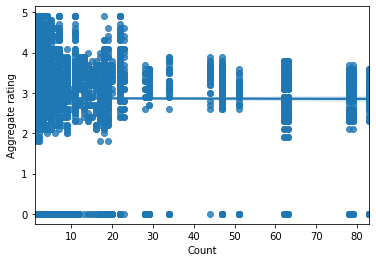

In [250]:
sns.regplot(x='Count',y='Aggregate rating',data=Rating)
Rating[["Count", "Aggregate rating"]].corr()

By looking at the plot we can say that the number of cuisines 

is not a good factor to decide the rating of a restaurant

,Average Cost for two,Aggregate rating
Average Cost for two,1.000000,0.051797
Aggregate rating,0.051797,1.000000


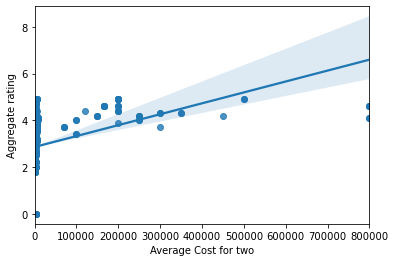

In [252]:
sns.regplot(x='Average Cost for two',y='Aggregate rating',data=Rating)
rating[["Average Cost for two", "Aggregate rating"]].corr()


Average cost for two is a weak positive factor to decide the rating of a restaurant

,Votes,Aggregate rating
Votes,1.000000,0.318667
Aggregate rating,0.318667,1.000000


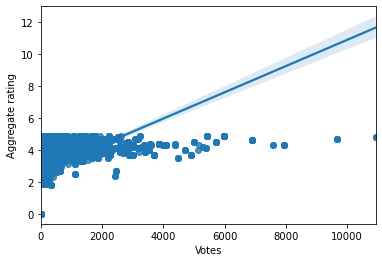

In [253]:
sns.regplot(x='Votes',y='Aggregate rating',data=Rating)
Rating[['Votes','Aggregate rating']].corr()
#Average cost for two can be a factor to decide the rating of a restaurant

,Price range,Aggregate rating
Price range,1.000000,0.462983
Aggregate rating,0.462983,1.000000


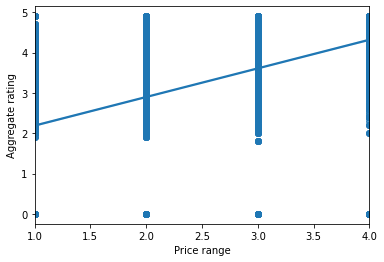

In [259]:
abc =datanew1[datanew1['Has Online delivery_Yes'] == 1]['Aggregate rating'].mean()
xyz = datanew1[datanew1['Has Online delivery_Yes'] == 0]['Aggregate rating'].mean()
sns.regplot(x='Price range',y='Aggregate rating',data=Rating)
Rating[['Price range','Aggregate rating']].corr()

Price range is related to rating

,Has Table booking_Yes,Aggregate rating
Has Table booking_Yes,1.000000,0.181843
Aggregate rating,0.181843,1.000000


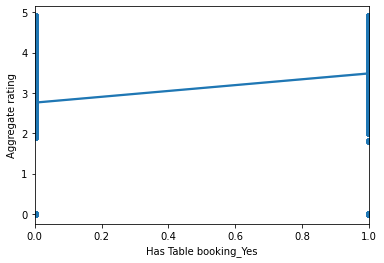

In [261]:
sns.regplot(x='Has Table booking_Yes',y='Aggregate rating',data=Rating)
Rating[['Has Table booking_Yes','Aggregate rating']].corr()

Table booking also playing role to decide the rating of a restaurant

,Has Online delivery_Yes,Aggregate rating
Has Online delivery_Yes,1.000000,0.192874
Aggregate rating,0.192874,1.000000


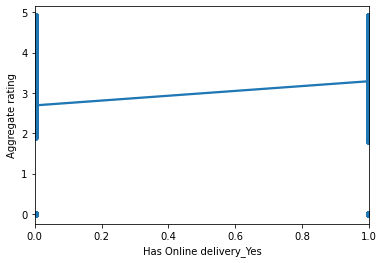

In [264]:
sns.regplot(x='Has Online delivery_Yes',y='Aggregate rating',data=Rating)
Rating[['Has Online delivery_Yes','Aggregate rating']].corr()

In [254]:
Rating.corr()

,Restaurant ID,Aggregate rating,Average Cost for two,Votes,Price range,Has Table booking_Yes,Has Online delivery_Yes,Count
Restaurant ID,1.000000,-0.303381,-0.000824,-0.167607,-0.134286,-0.067326,-0.094954,-0.130032
Aggregate rating,-0.303381,1.000000,0.050110,0.318667,0.462983,0.181843,0.192874,-0.001642
Average Cost for two,-0.000824,0.050110,1.000000,0.053981,0.067645,0.007294,-0.020408,-0.010969
Votes,-0.167607,0.318667,0.053981,1.000000,0.318214,0.143131,0.031575,-0.046969
Price range,-0.134286,0.462983,0.067645,0.318214,1.000000,0.469613,0.055684,-0.064597
Has Table booking_Yes,-0.067326,0.181843,0.007294,0.143131,0.469613,1.000000,0.096722,-0.091404
Has Online delivery_Yes,-0.094954,0.192874,-0.020408,0.031575,0.055684,0.096722,1.000000,0.050015
Count,-0.130032,-0.001642,-0.010969,-0.046969,-0.064597,-0.091404,0.050015,1.000000


<AxesSubplot:>

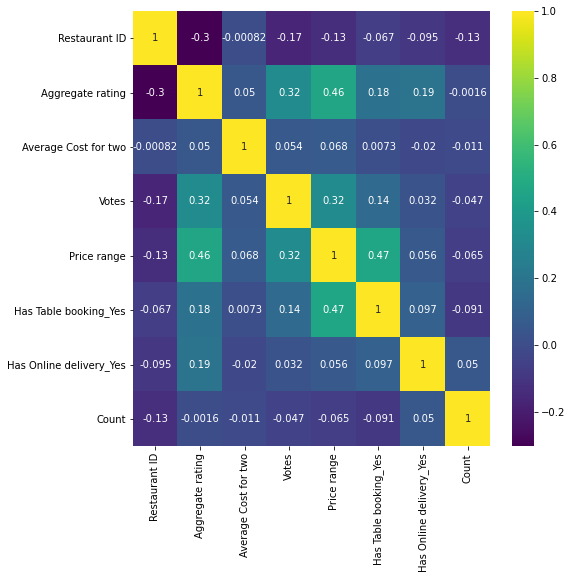

In [263]:
plt.subplots(figsize=(8,8))
sns.heatmap(Rating.corr(),annot=True,cmap='viridis')

We can observe that the "Table booking", "Online delivery", "Average cost of two","Price range", and "Votes count" 

playing a part in affecting the Rating of restaurant.

Here, all the task is performed successfully.